# Project 02 - Data Visualization

The objective of the exercise is to import stock data of companies for the calendar years 2016 & 2017 and create meaningful visualizations that would help in interpreting the trends and using it as an input in analyzing it as part of exploratory data analysis

# Data Import
Data from the csv is being imported and some details of the data are explored

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
all = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')

In [3]:
all['Name'].unique()

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

In [4]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
Date      93612 non-null object
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


In [5]:
AAPL = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')

In [6]:
 apple = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')

In [7]:
AAPL = AAPL.drop('Name', axis=1)

In [8]:
apple.drop('Name', axis=1, inplace = True)

In [9]:
apple.set_index('Date', inplace = True)

# Viz 01 - Relationship between monthly avg Closing prices and Volume of stocks traded

The closing prize of the stocks are grouped and averaged on a monthly basis and the relationship between the volume of stocks traded and the closing price of the stock is being explored in this section

In [10]:
stocks = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')

In [11]:
stocks['NDate'] = pd.to_datetime(stocks['Date'])

In [12]:
stocks['year'], stocks['month'] = stocks['NDate'].dt.year, stocks['NDate'].dt.month

In [13]:
stocks.head()

,Date,Open,High,Low,Close,Volume,Name,NDate,year,month
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006-01-03,2006,1
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006-01-04,2006,1
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006-01-05,2006,1
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006-01-06,2006,1
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006-01-09,2006,1


In [14]:
mntStock = stocks.groupby(['Name', 'year', 'month']).mean().reset_index()

In [15]:
aaplMntStock = mntStock[mntStock['Name'] == 'AAPL']
amznMntStock = mntStock[mntStock['Name'] == 'AMZN']
msftMntStock = mntStock[mntStock['Name'] == 'MSFT']
goglMntStock = mntStock[mntStock['Name'] == 'GOOGL']

Text(0.5,1,'Apple Monthly Mean Stocks : Closing vs Volume')

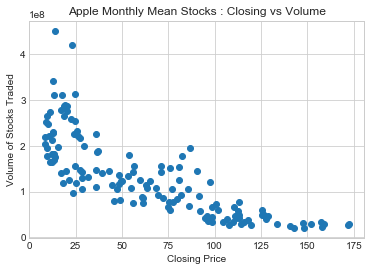

In [16]:
plt.scatter(aaplMntStock['Close'], aaplMntStock['Volume'])
plt.xlabel('Closing Price')
plt.ylabel('Volume of Stocks Traded')
plt.title('Apple Monthly Mean Stocks : Closing vs Volume')

plt.scatter(amznMntStock['Close'], amznMntStock['Volume'])
plt.xlabel('Closing Price')
plt.ylabel('Volume of Stocks Traded')
plt.title('Amazon Monthly Mean Stocks : Closing vs Volume')

Text(0.5,1,'Google Monthly Mean Stocks : Closing vs Volume')

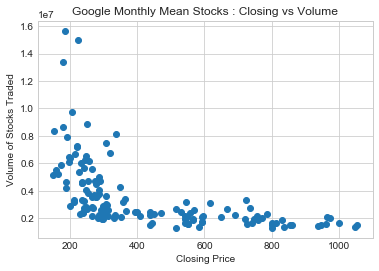

In [17]:
plt.scatter(goglMntStock['Close'], goglMntStock['Volume'])
plt.xlabel('Closing Price')
plt.ylabel('Volume of Stocks Traded')
plt.title('Google Monthly Mean Stocks : Closing vs Volume')

Text(0.5,1,'Microsoft Monthly Mean Stocks : Closing vs Volume')

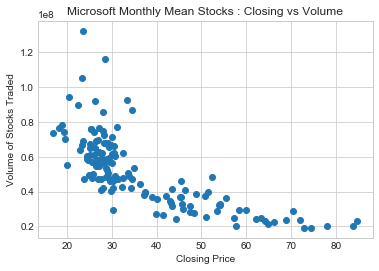

In [18]:
plt.scatter(msftMntStock['Close'], msftMntStock['Volume'])
plt.xlabel('Closing Price')
plt.ylabel('Volume of Stocks Traded')
plt.title('Microsoft Monthly Mean Stocks : Closing vs Volume')

# Viz 02 - Apple Closing Stock Prices between 2016 and 2017

Performance of the apple stock (closing price) is analyzed in the graph below to understand the performance of the organization in the past 2 years

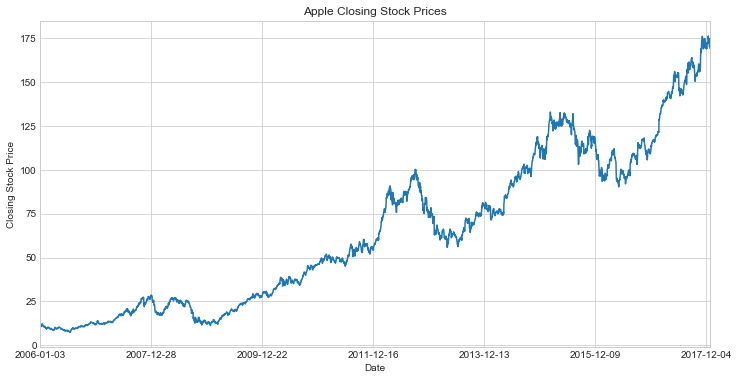

In [19]:
fig, ax = plt.subplots(1,1)
ax.set_ylabel('Closing Stock Price')
ax.set_title('Apple Closing Stock Prices')
apple['Close'].plot(figsize = (12,6))

# Viz 03 - Moving Averages of apple stocks

Moving averages help in smoothing out the variation in data by applying the concept of rolling mean and helps in easily intrepetable visual aid 

In [45]:
days = [10,20,50,100]

for ma in days:
    column_name = 'MA for %s days' %(str(ma))
    apple[column_name] = pd.rolling_mean(apple['Close'],ma)

C:\Users\vajra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
C:\Users\vajra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
C:\Users\vajra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  """
C:\Users\vajra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
  """


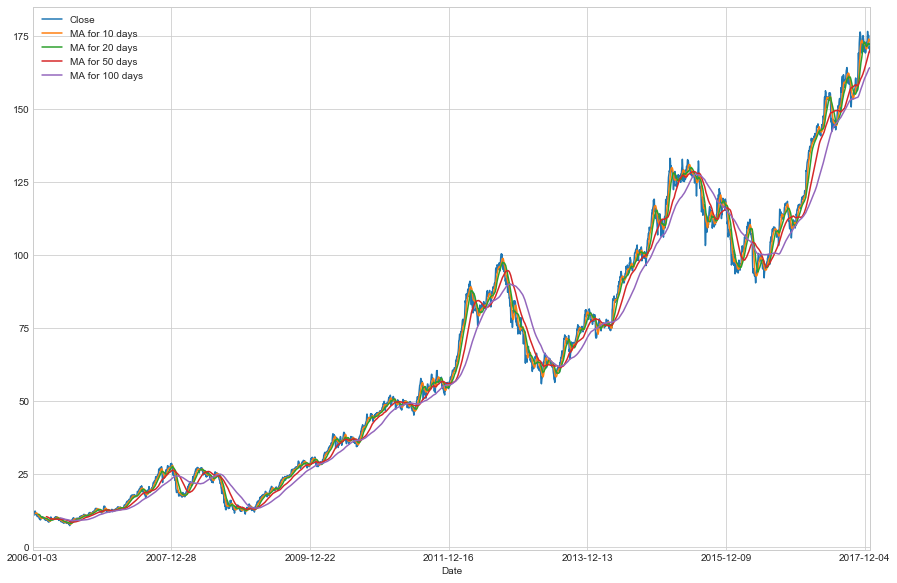

In [21]:
apple[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(15,10))

# Viz 04 - Daily Retuns in Apple Stocks based on closing price

[Text(0,0.5,'Percent Change')]

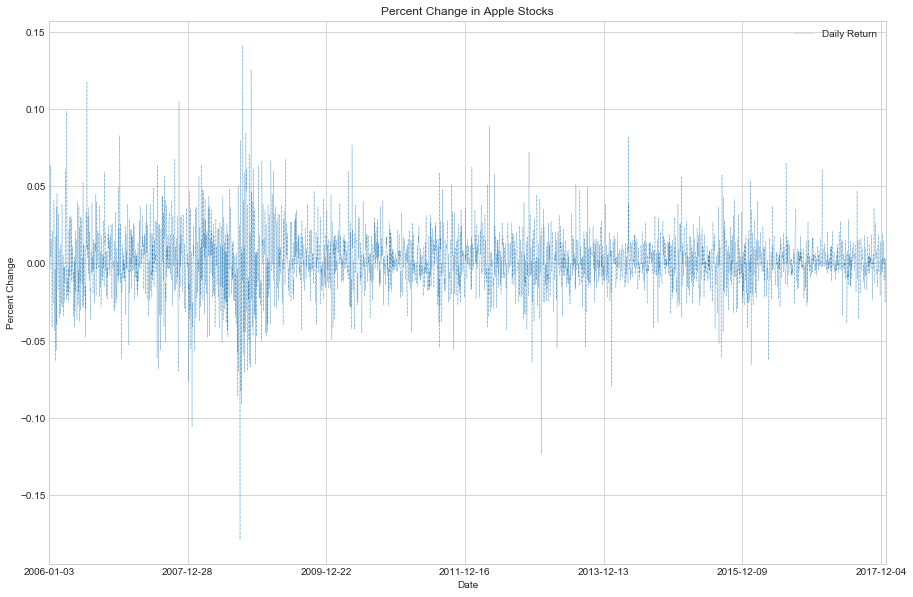

In [54]:
# pct_change to find the percent change for each day
apple['Daily Return'] = apple['Close'].pct_change()

# Lets plot the daily return percentage
fig = apple['Daily Return'].plot(figsize=(15,10), legend=True, linestyle=':', lw = 0.5, title = 'Percent Change in Apple Stocks')
fig.set(ylabel= 'Percent Change')

# Viz 05 - Distribution of Daily Returns of Apple stocks on a daily basis

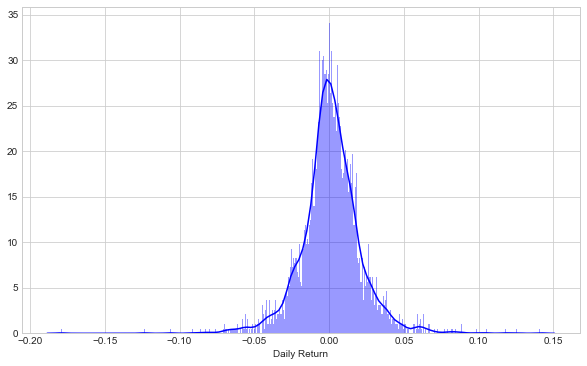

In [50]:
ax = plt.subplots(figsize=(10,6))
fig = sns.distplot(apple['Daily Return'].dropna(), bins=500, color='blue', kde=True)

# Viz 06 - Linear Relationship between Microsoft and Amazon stock closing prices

In [24]:
APPL1 = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')
AMZN = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')
GOGL = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv')
MSFT = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv')

In [25]:
APPL1 = APPL1.sort_values(by='Date', ascending=True)
GOGL = GOGL.sort_values(by='Date', ascending=True)
AMZN = AMZN.sort_values(by='Date', ascending=True)
MSFT = MSFT.sort_values(by='Date', ascending=True)

tech = pd.DataFrame()
tech ['ApplDate'] = APPL1['Date']
tech ['AmznDate'] = AMZN['Date']
tech ['GoglDate'] = GOGL['Date']
tech ['MsftDate'] = MSFT['Date']
tech ['AAPL'] = APPL1['Close']
tech ['AMZN'] = AMZN['Close']
tech ['GOGL'] = GOGL['Close']
tech ['MSFT'] = MSFT['Close']

In [26]:
tech.drop(['ApplDate', 'AmznDate', 'GoglDate'], axis = 1, inplace = True)

In [27]:
tech.rename(columns = {'MsftDate' : 'Date'}, inplace = True)

In [28]:
tech.set_index('Date', inplace = True)

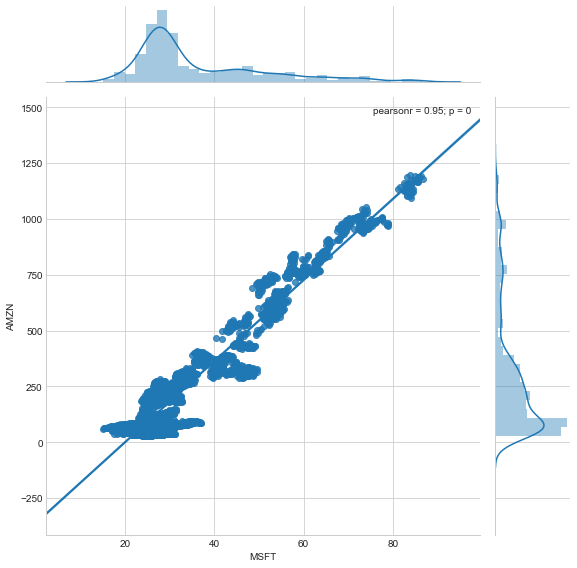

In [29]:
sns.jointplot('MSFT', 'AMZN', data=tech, kind='reg', size=8)

# Viz 07 - Analyzing the correlations between closing prices of tech stocks using a Heatmap

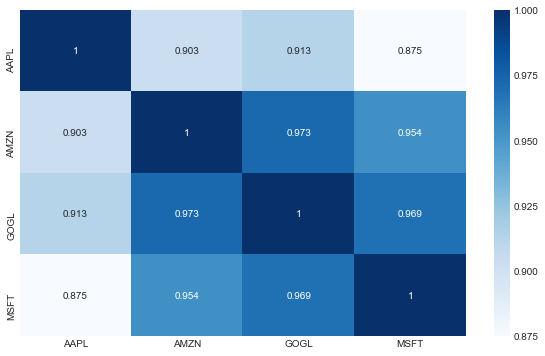

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(tech.corr(),annot=True,fmt=".3g",cmap='Blues')

# Viz 08 - Exploration of relationship between tech stocks using pairplots

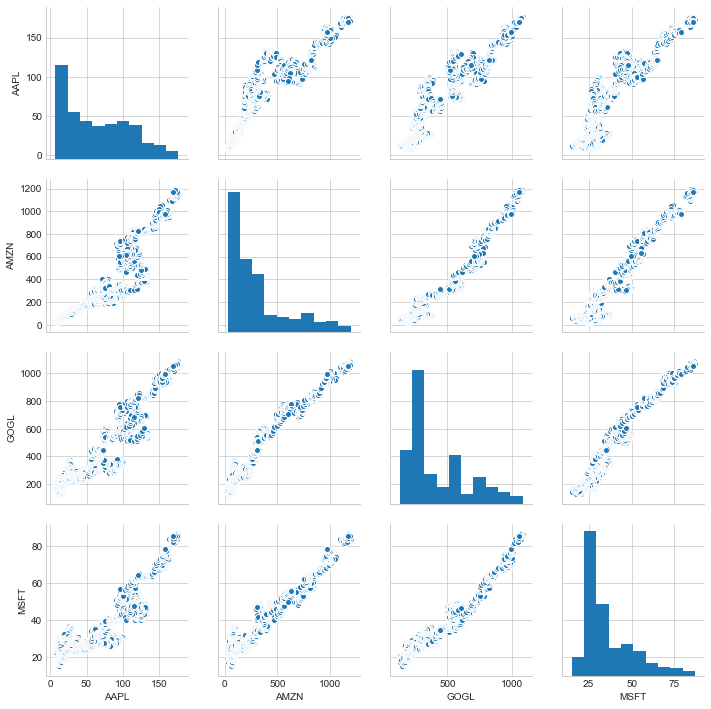

In [30]:
sns.pairplot(data=tech)

# Viz 09 - Tech stock trends - Closing stock prices

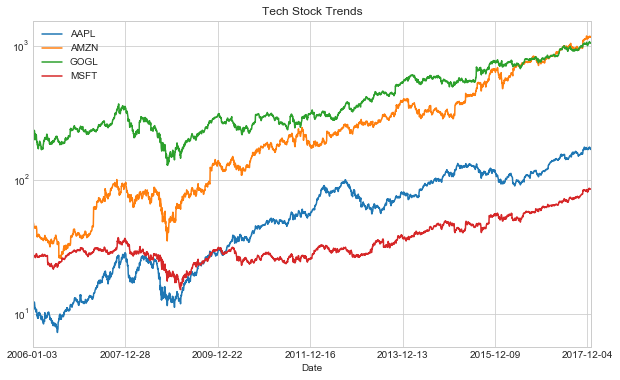

In [56]:
tech[['AAPL','AMZN','GOGL','MSFT']].plot(subplots=False,figsize=(10,6), title = 'Tech Stock Trends', logy = True)

# Viz 10 - Analyzing Variation and pct change of stocks traded
Variation is calculated as a measure of variance in the high/low prices of stock on a daily basis. Percent Change is calculated on actuals like the opening and closing stock prices

In [32]:
ibm = stocks[stocks['Name'] == 'IBM']

In [33]:
ibm['pctChange'] = ((ibm['Close'] - ibm['Open'])/ ibm['Open'])*100

C:\Users\vajra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
ibm['variation'] = ((ibm['High'] - ibm['Low'])/ibm['Low'])*100

C:\Users\vajra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
ibm.set_index('Date', inplace=True)

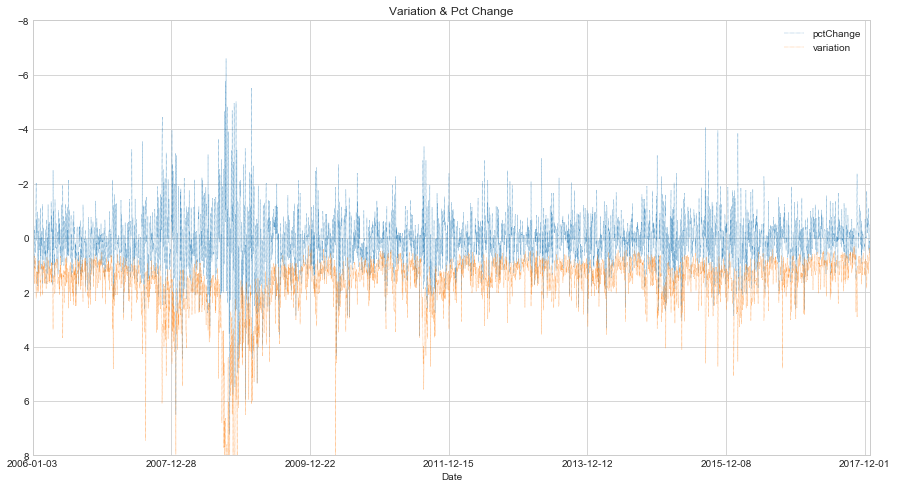

In [36]:
ibm[['pctChange','variation']].plot( figsize = (15,8) , lw = 0.45, ls = ':', ylim = (8,-8), title = 'Variation & Pct Change')